In [1]:
import seaborn as sns


# Import a bunch of libraries.
import pandas as pd
import re
import string
import nltk
import json
import os

from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
C:\Users\ashwi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df_Data = pd.read_csv("../data/sample-data.csv")
df_Data.head()

,auth_ts,mcc,mid,auth_merch_name,auth_amt,local_amt
0,2021-08-03 05:15:59.000,5812,4445028928044,TST* THE BLUEBERRY MUF PLYMOUTH MA,3.41,3.41
1,2021-08-03 05:15:59.000,5818,160146000762203,Blink amzn.com/bill WA,3.00,3.00
2,2021-08-03 05:16:00.000,5942,235251000762203,AMZN Mktp US Amzn.com/bill WA,31.97,31.97
3,2021-08-03 05:16:00.000,5814,385106000000000,MCDONALD'S F103 ANNAPOLIS MD,8.88,8.88
4,2021-08-03 05:16:00.000,5945,527021000203861,Oculus Menlo Park CA,0.00,0.00


In [3]:
df_Data.describe()

,mcc,auth_amt,local_amt
count,100000.000000,100000.000000,99981.00000
mean,5812.932090,13.746925,33.65583
std,644.894402,31.369086,1696.17650
min,742.000000,0.000000,0.00000
25%,5735.000000,2.770000,2.60000
50%,5814.000000,7.990000,7.99000
75%,5818.000000,14.480000,14.25000
max,9402.000000,3192.000000,279950.00000


In [4]:
df_merchant = pd.read_csv("../data/merchant_cat_details.csv")
df_merchant.head(100)
#get mcc id and name in dict
dict_mcc = df_merchant.set_index('mcc').T.to_dict('list')

In [5]:
#add general catfrom and name 
df_Data["mcc_gen"] = 0
df_Data["mcc_gen_name"] = ""
df_Data["mcc_name"] = ""
df_Data.head()

,auth_ts,mcc,mid,auth_merch_name,auth_amt,local_amt,mcc_gen,mcc_gen_name,mcc_name
0,2021-08-03 05:15:59.000,5812,4445028928044,TST* THE BLUEBERRY MUF PLYMOUTH MA,3.41,3.41,0,,
1,2021-08-03 05:15:59.000,5818,160146000762203,Blink amzn.com/bill WA,3.00,3.00,0,,
2,2021-08-03 05:16:00.000,5942,235251000762203,AMZN Mktp US Amzn.com/bill WA,31.97,31.97,0,,
3,2021-08-03 05:16:00.000,5814,385106000000000,MCDONALD'S F103 ANNAPOLIS MD,8.88,8.88,0,,
4,2021-08-03 05:16:00.000,5945,527021000203861,Oculus Menlo Park CA,0.00,0.00,0,,


In [6]:
# merge data and merchant catagory dataset 


for i in range(len(df_Data)):    
    #print(dict_mcc[df_Data.loc[i, "mcc"]][0],dict_mcc[df_Data.loc[i, "mcc"]][1] )
    if df_Data.loc[i, "mcc"] in dict_mcc:
        df_Data.loc[i, "mcc_name"] = dict_mcc[df_Data.loc[i, "mcc"]][0]
        df_Data.loc[i, "mcc_gen_name"] = dict_mcc[df_Data.loc[i, "mcc"]][1]   
    


# add encoder for gen cat
le = preprocessing.LabelEncoder()
df_Data['mcc_gen'] = le.fit_transform(df_Data['mcc_gen_name']) 
        
df_Data.head()

df_Data.to_csv('../data/df_Data.csv', index=False)

In [7]:
df_Data = pd.read_csv("../data/df_Data.csv",nrows=10000)
df_Data.head()

,auth_ts,mcc,mid,auth_merch_name,auth_amt,local_amt,mcc_gen,mcc_gen_name,mcc_name
0,2021-08-03 05:15:59.000,5812,4445028928044,TST* THE BLUEBERRY MUF PLYMOUTH MA,3.41,3.41,8,miscellaneous_stores,"Eating Places and Restaurants V, M"
1,2021-08-03 05:15:59.000,5818,160146000762203,Blink amzn.com/bill WA,3.00,3.00,8,miscellaneous_stores,Digital Goods: Large Digital Goods Merchant (...
2,2021-08-03 05:16:00.000,5942,235251000762203,AMZN Mktp US Amzn.com/bill WA,31.97,31.97,8,miscellaneous_stores,"Book Stores V, M"
3,2021-08-03 05:16:00.000,5814,385106000000000,MCDONALD'S F103 ANNAPOLIS MD,8.88,8.88,8,miscellaneous_stores,"Fast Food Restaurants V, M"
4,2021-08-03 05:16:00.000,5945,527021000203861,Oculus Menlo Park CA,0.00,0.00,8,miscellaneous_stores,"Game, Toy and Hobby Shops V, M"


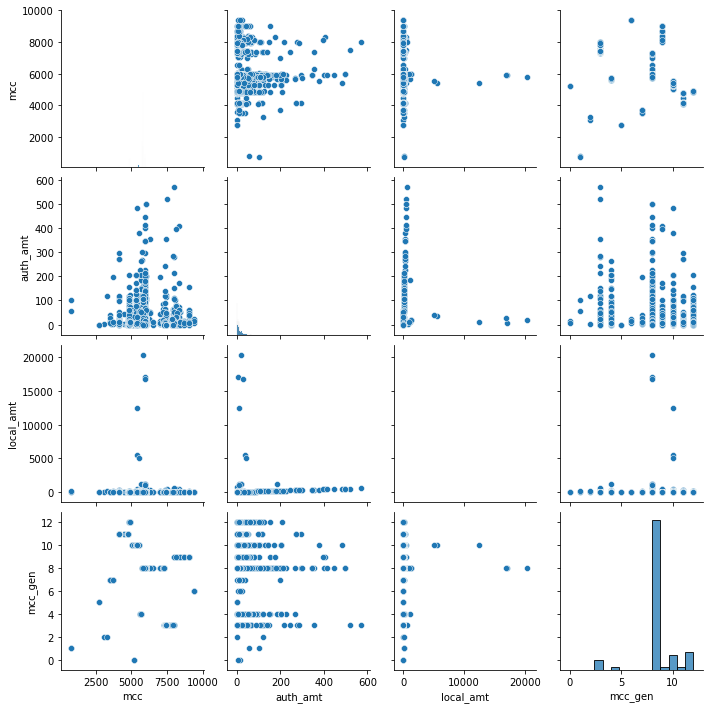

In [16]:
# relationship between spending and category and mercahnt name
sns.pairplot(df_Data)

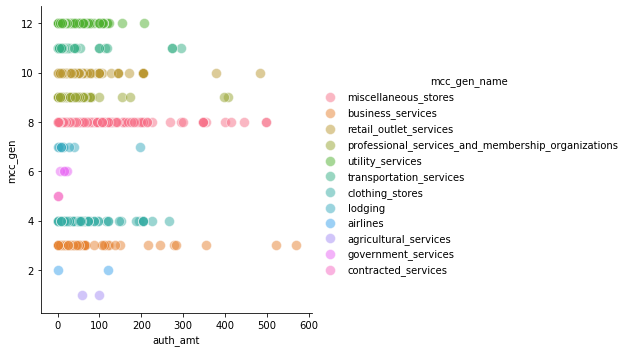

In [17]:
g = sns.FacetGrid(df_Data, hue="mcc_gen_name", height=5)
g.map(sns.scatterplot, "auth_amt", "mcc_gen", s=100, alpha=.5)
g.add_legend()


In [ ]:
g = sns.FacetGrid(df_Data, hue="mcc_gen_name", height=5)
g.map(sns.scatterplot, "auth_amt", "mcc_gen", s=100, alpha=.5)
g.add_legend()

There are more spending in Misc stores/ biz servies . Government and contracted services shows les spends . 
